In [1]:
import glob
import os
import pickle
import pandas as pd

In [2]:
from auxiliary import * 

In [3]:
% matplotlib inline

In [18]:
mainDir='/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/'
filePattern = 'S20031932003196.L3b_4D*'
fileList = glob.glob(os.path.join(mainDir,filePattern))
fileList.sort()
snrs = ['NIR_SNR_' + str(k) for k in range(500,850,50)]
simDict = dict.fromkeys(snrs)
for file,snr in zip(fileList, snrs):
    sfx = int(file.split('.')[1][-2:])
    simDict[snr] = file

In [19]:
simDict

{'NIR_SNR_500': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU20.nc',
 'NIR_SNR_550': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU21.nc',
 'NIR_SNR_600': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU22.nc',
 'NIR_SNR_650': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU23.nc',
 'NIR_SNR_700': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU24.nc',
 'NIR_SNR_750': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU25.nc',
 'NIR_SNR_800': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/

In [20]:
rhoUnc95Dict = dict.fromkeys(snrs)
for snr in snrs:
    # Get data needed in form of a dict.
    if simDict[snr]:
        print('processing %s' % simDict[snr])
        _,rhoUncDict,_ = GetDataDicts(fp=simDict[snr])
        # Fill out 95 ptile dictionary for corresponding snr sim - result is a nested dictionary with
        # bands as keys to the internal dict
        rhoUnc95Dict[snr] = GetPtileDict(rhoUncDict) 
pickle.dump(rhoUnc95Dict,open('snr_vvv1500_nirSens.p','wb'))

processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU20.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU21.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU22.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU23.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU24.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/PACE_vvv1000/S20031932003196.L3b_4D_SU25.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/PACE_1607xx/P

In [25]:
df95 = pd.DataFrame(rhoUnc95Dict)
df95.dropna(axis=1,how='all',inplace=True)
df95.to_pickle('df_snr_vvv1000_nirSens.p')

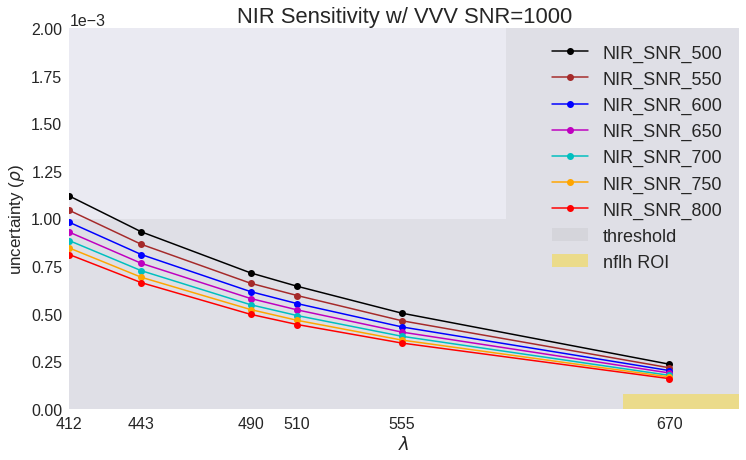

In [23]:
SummaryPlot(df95,savepath='snrSens_vvv1000nir500_800.png',
           title='NIR Sensitivity w/ VVV SNR=1000')

In [24]:
df95

,NIR_SNR_500,NIR_SNR_550,NIR_SNR_600,NIR_SNR_650,NIR_SNR_700,NIR_SNR_750,NIR_SNR_800
412,0.001118,0.001043,0.000980,0.000928,0.000884,0.000845,0.000811
443,0.000930,0.000864,0.000811,0.000764,0.000726,0.000691,0.000663
490,0.000714,0.000660,0.000616,0.000580,0.000547,0.000522,0.000496
510,0.000644,0.000595,0.000553,0.000520,0.000490,0.000465,0.000443
555,0.000503,0.000463,0.000430,0.000403,0.000381,0.000361,0.000346
670,0.000235,0.000216,0.000201,0.000188,0.000176,0.000168,0.000159
